In [19]:
import pandas as pd

df=pd.read_csv('data\data.csv')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
del df['CUST_ID']
mean=df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(mean)
df.fillna(0,inplace=True)

In [22]:
from sklearn.cluster import KMeans

mdl=KMeans(n_clusters=2,max_iter=20).fit(df)
print(mdl.cluster_centers_)


[[3.83866808e+03 9.40156590e-01 2.36957566e+03 1.55520968e+03
  8.14750735e+02 2.59438775e+03 5.58047603e-01 3.46603529e-01
  4.05812702e-01 2.27183749e-01 6.55787278e+00 2.80594369e+01
  9.83133709e+03 4.29699004e+03 1.76338057e+03 1.49630563e-01
  1.17393118e+01]
 [9.44181502e+02 8.60118409e-01 6.30522915e+02 3.29838212e+02
  3.00961819e+02 5.38233897e+02 4.71885965e-01 1.63141453e-01
  3.53152083e-01 1.10040125e-01 2.34627418e+00 1.10686860e+01
  3.03815751e+03 1.03384678e+03 6.18954012e+02 1.54828596e-01
  1.14567691e+01]]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(df))
print(scaler.transform(df))

columns=df.columns
df=scaler.transform(df)
df=pd.DataFrame(df)
df.columns=columns


StandardScaler()
[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


In [25]:
model=KMeans(n_clusters=3,max_iter=20).fit(df)
model_pred=model.predict(df)
print(model.cluster_centers_)


[[-3.69101542e-01 -1.86993979e-01 -2.41459607e-01 -2.11579033e-01
  -1.82109058e-01 -3.07947000e-01 -8.11915496e-02 -2.57456683e-01
  -5.77655666e-02 -3.30950520e-01 -2.96873158e-01 -2.55340669e-01
  -3.46787433e-01 -2.88112626e-01 -1.35325724e-01 -4.86001134e-04
  -3.31401054e-02]
 [ 1.16678733e+00  3.42818049e-01 -2.89224695e-01 -2.06585394e-01
  -3.04401087e-01  1.38120201e+00 -6.39452621e-01 -3.02928348e-01
  -5.52879550e-01  1.56228965e+00  1.34178505e+00 -3.64929657e-01
   6.03253471e-01  4.43654644e-01  3.89687478e-01 -4.11826046e-01
  -1.20594440e-01]
 [ 2.76556206e-01  4.38179759e-01  1.44441324e+00  1.20942886e+00
   1.19293787e+00 -2.58729764e-01  1.13657353e+00  1.53355588e+00
   9.26197054e-01 -3.71586864e-01 -2.61732052e-01  1.59837014e+00
   8.51654439e-01  7.76621920e-01  1.47130341e-01  4.96585892e-01
   2.95359290e-01]]


In [26]:
from sklearn.manifold import TSNE

df_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df)
df_embedded.shape


(8950, 2)

In [28]:

k_model=KMeans(n_clusters=4,max_iter=10).fit(df_embedded)
model_pred=k_model.predict(df_embedded)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

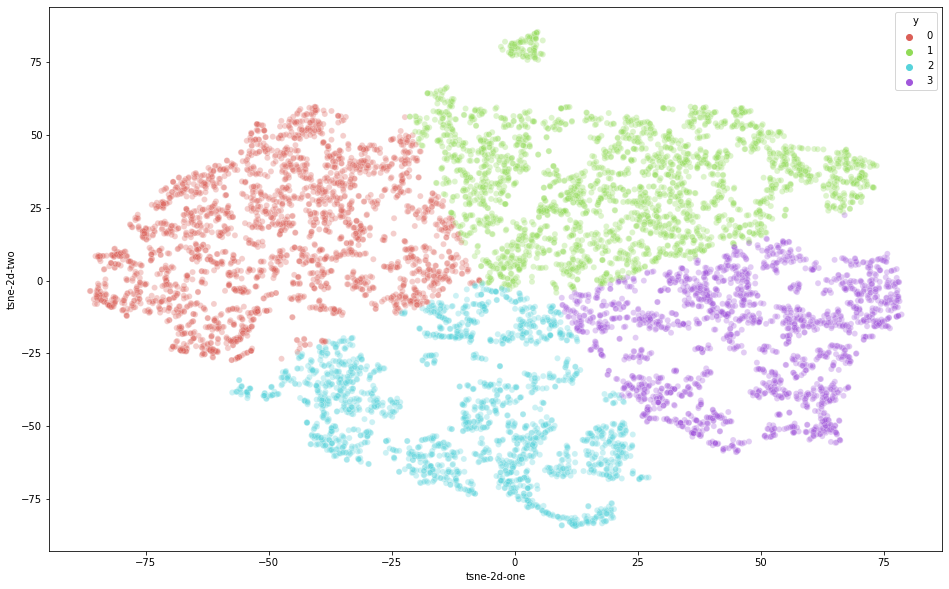

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd

df['tsne-2d-one'] = df_embedded[:,0]
df['tsne-2d-two'] = df_embedded[:,1]
df['y'] =model_pred

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls",4),
    data=df,
    legend="full",
    alpha=0.3
)